# Misharin (GSE127803) - Annotation (of filtered data)
Mice aged 8-10 weeks were instilled intratracheally with control particles or crocidolite asbestos fibers to induce lung fibrosis. Lungs were then harvested at different time points (depending on the analysis method).
Single-cell RNA sequencing was done on a HiSeq 4000 instrument (Illumina) using Chromium Single Cell v2 Reagent Kit and Controller for the library preparation.

In [33]:
import helper_classes_DanielStrobl
import scanpy
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)
scanpy.settings.verbosity = 0
scanpy.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
base = "GSE127803_RAW/"
output = "output/"

In [4]:
misharin_filtered = scanpy.read(output + 'misharin_Emma_processed_without_annotation.h5ad')

## Creating UMAP to annotate:
Resolution of 0.5 to get around 20 clusters.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


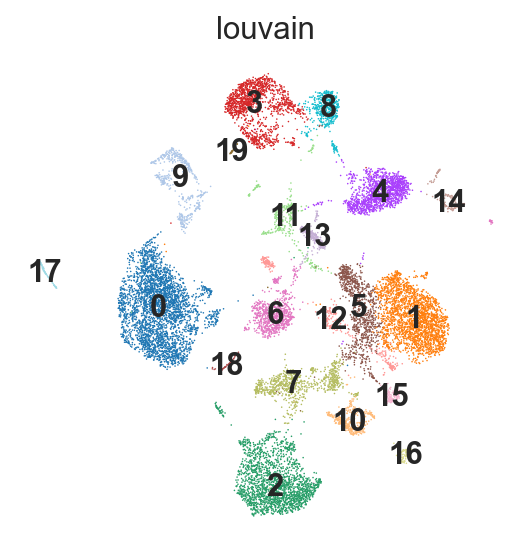

In [92]:
scanpy.tl.louvain(misharin_filtered, resolution=0.5)
scanpy.pl.umap(misharin_filtered, color='louvain', size=2, legend_loc="on data")

## Rough annotation using the method **plot_markers()**:

Macrophages


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


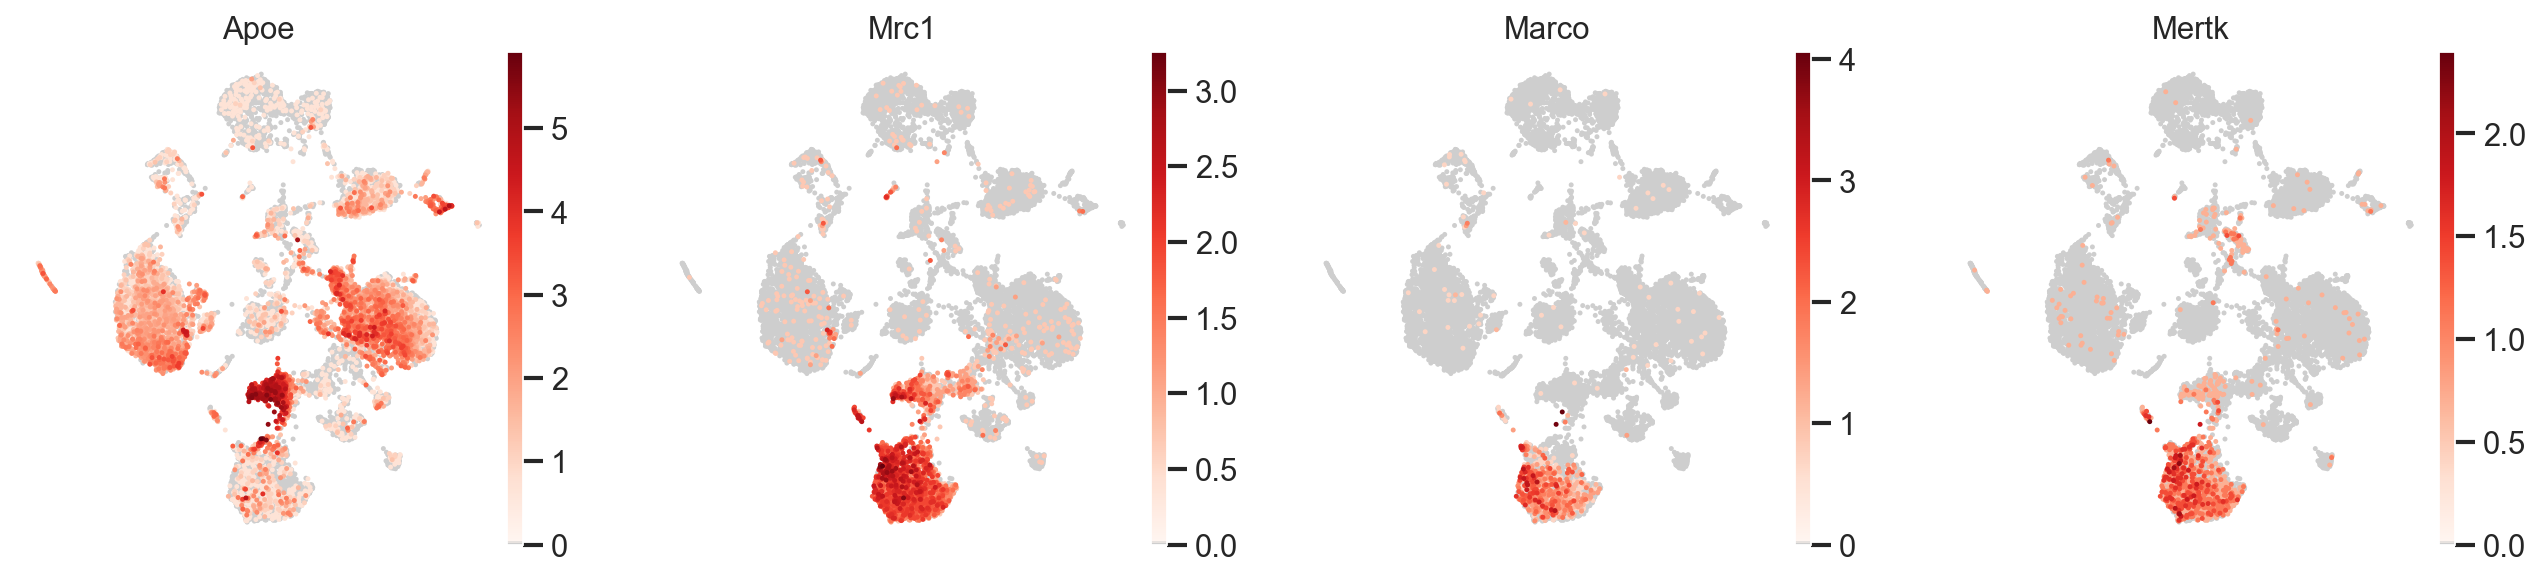

Monocytes


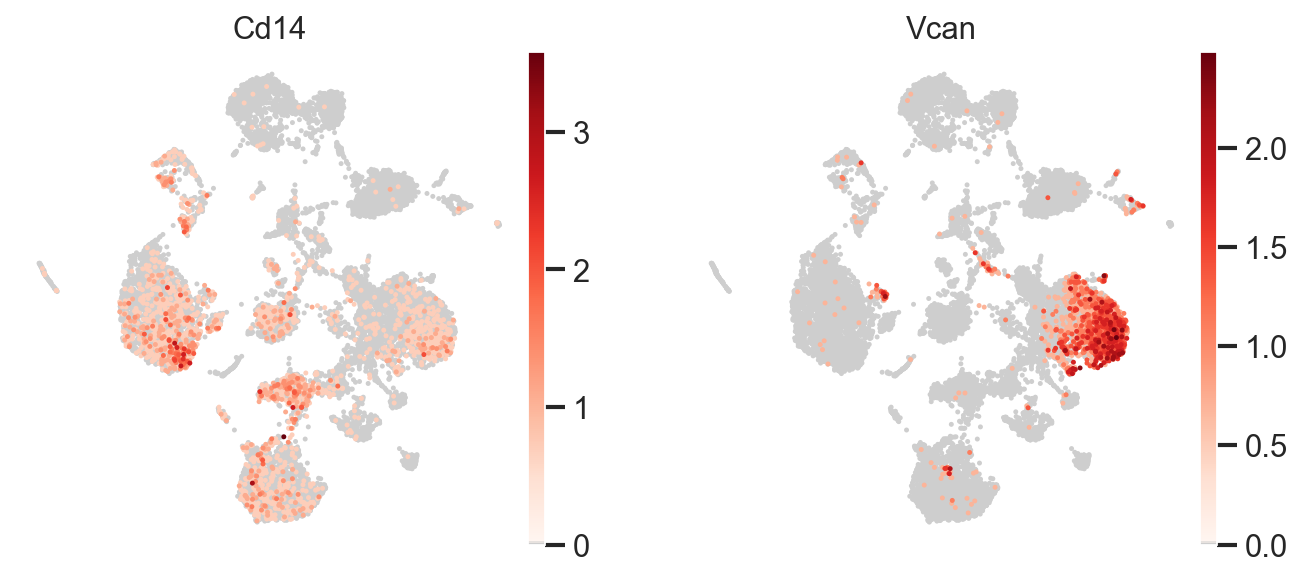

T-Cells


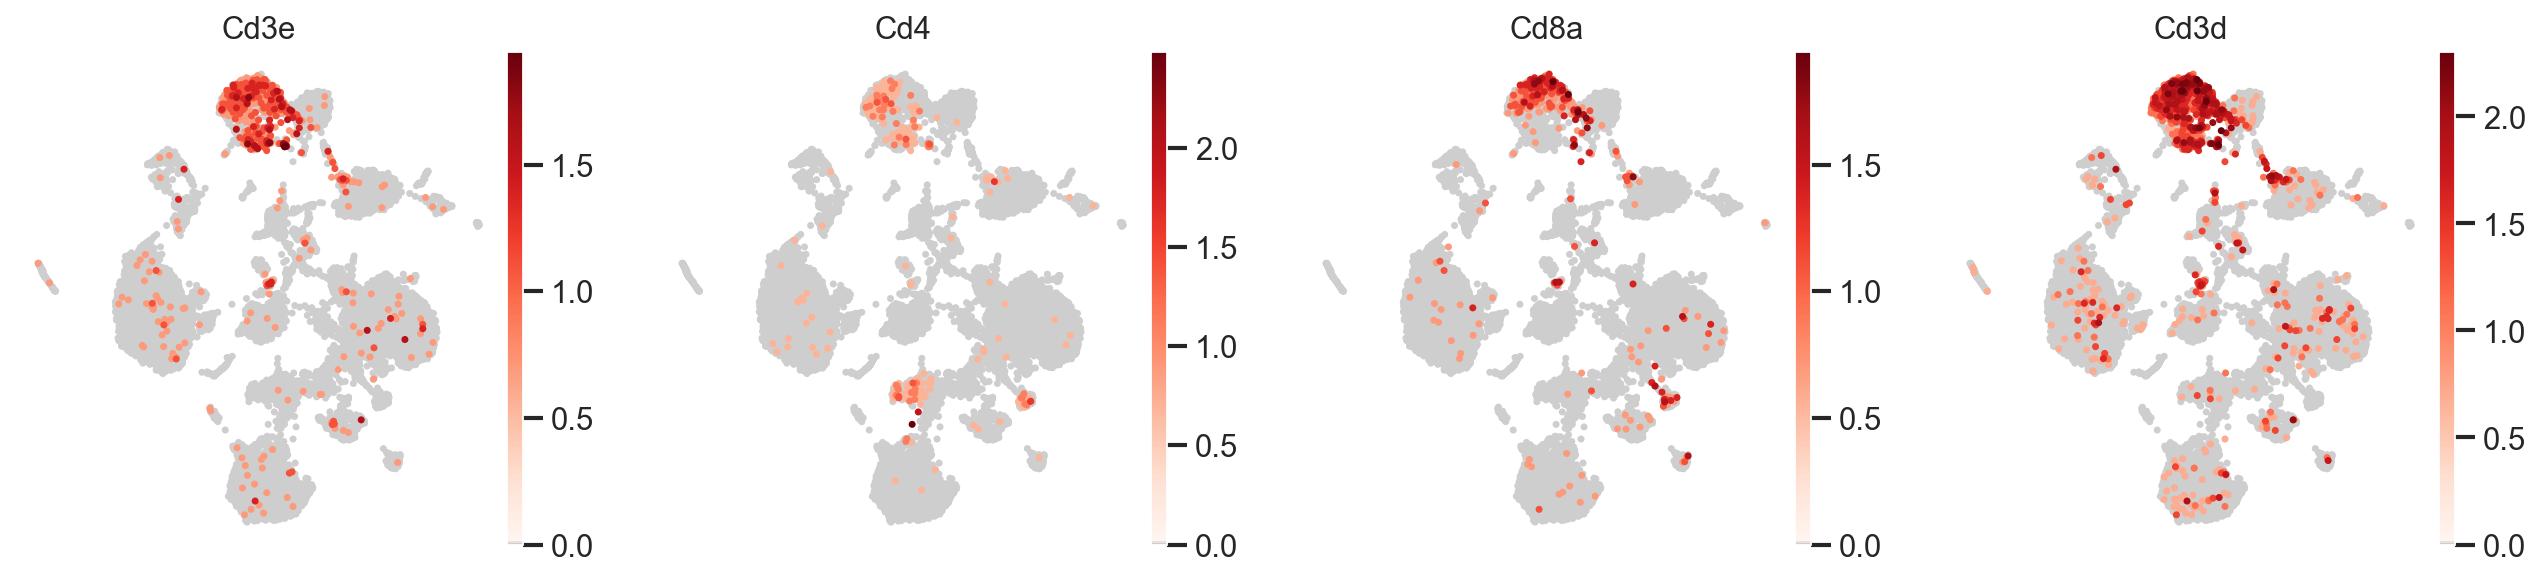

B-Cells


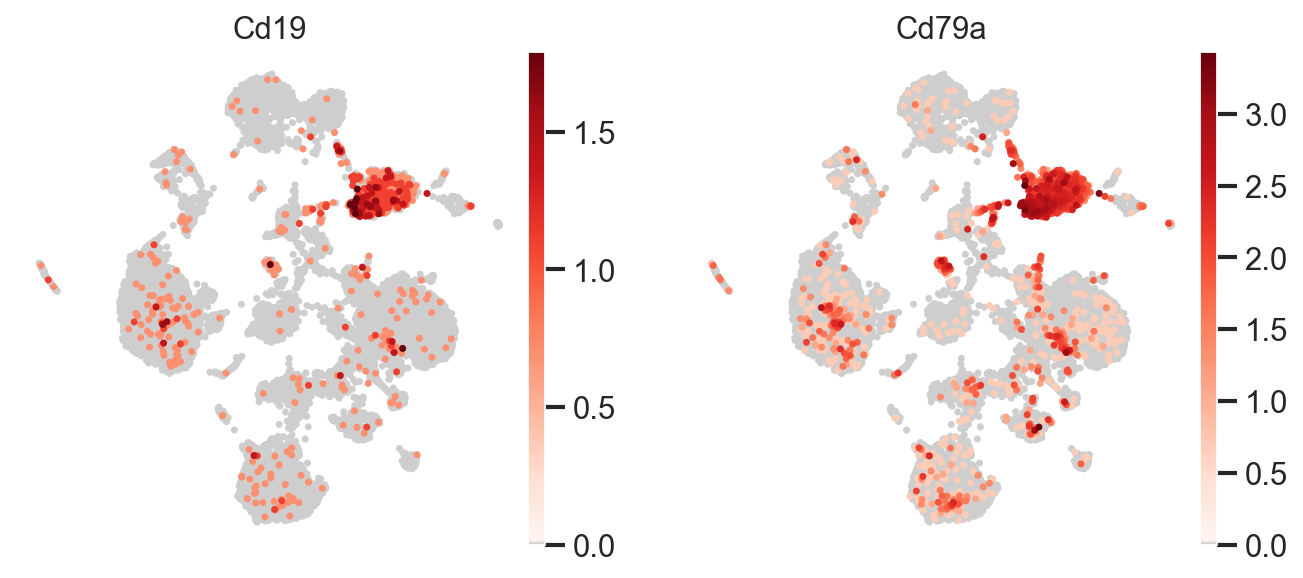

AT2


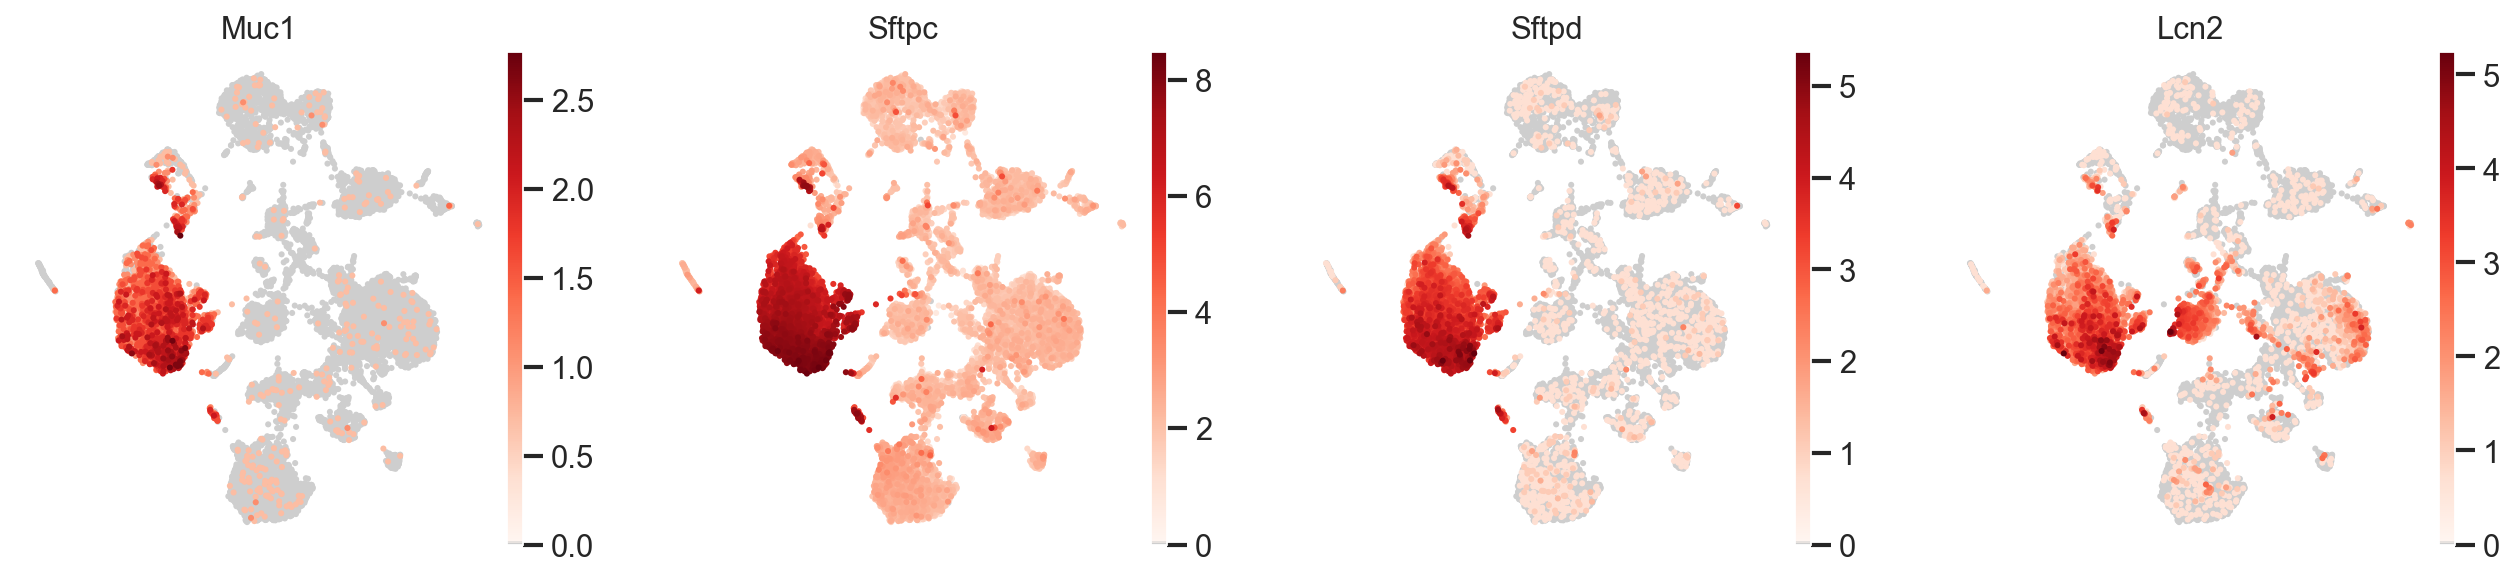

AT1


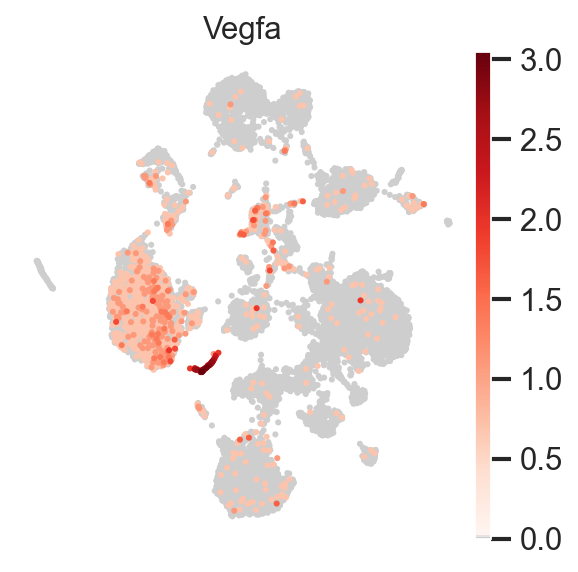

Krt8


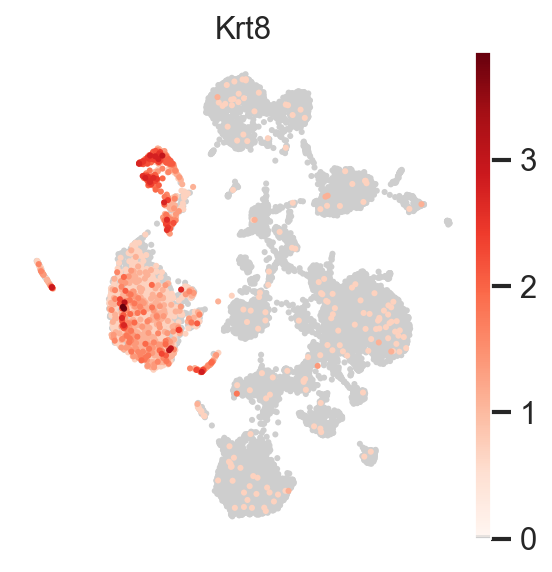

Endothelial


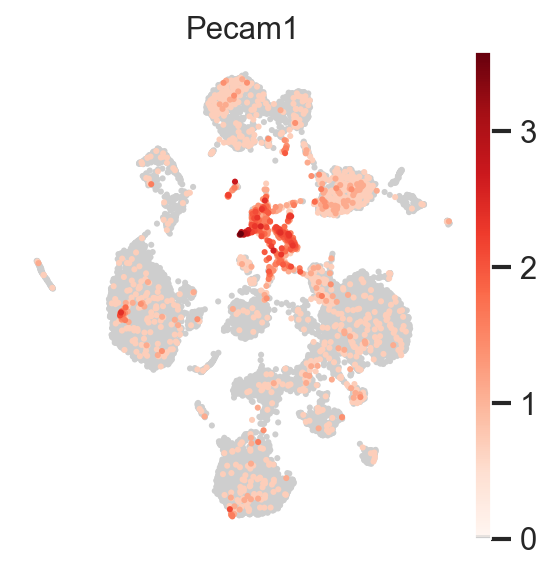

Fibroblasts


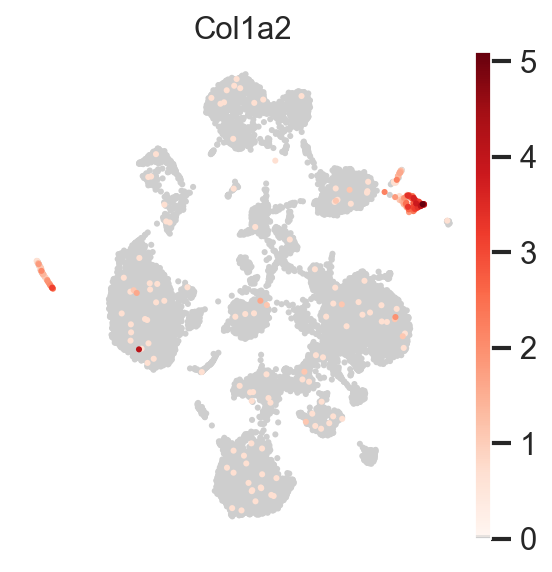

Myofibroblasts


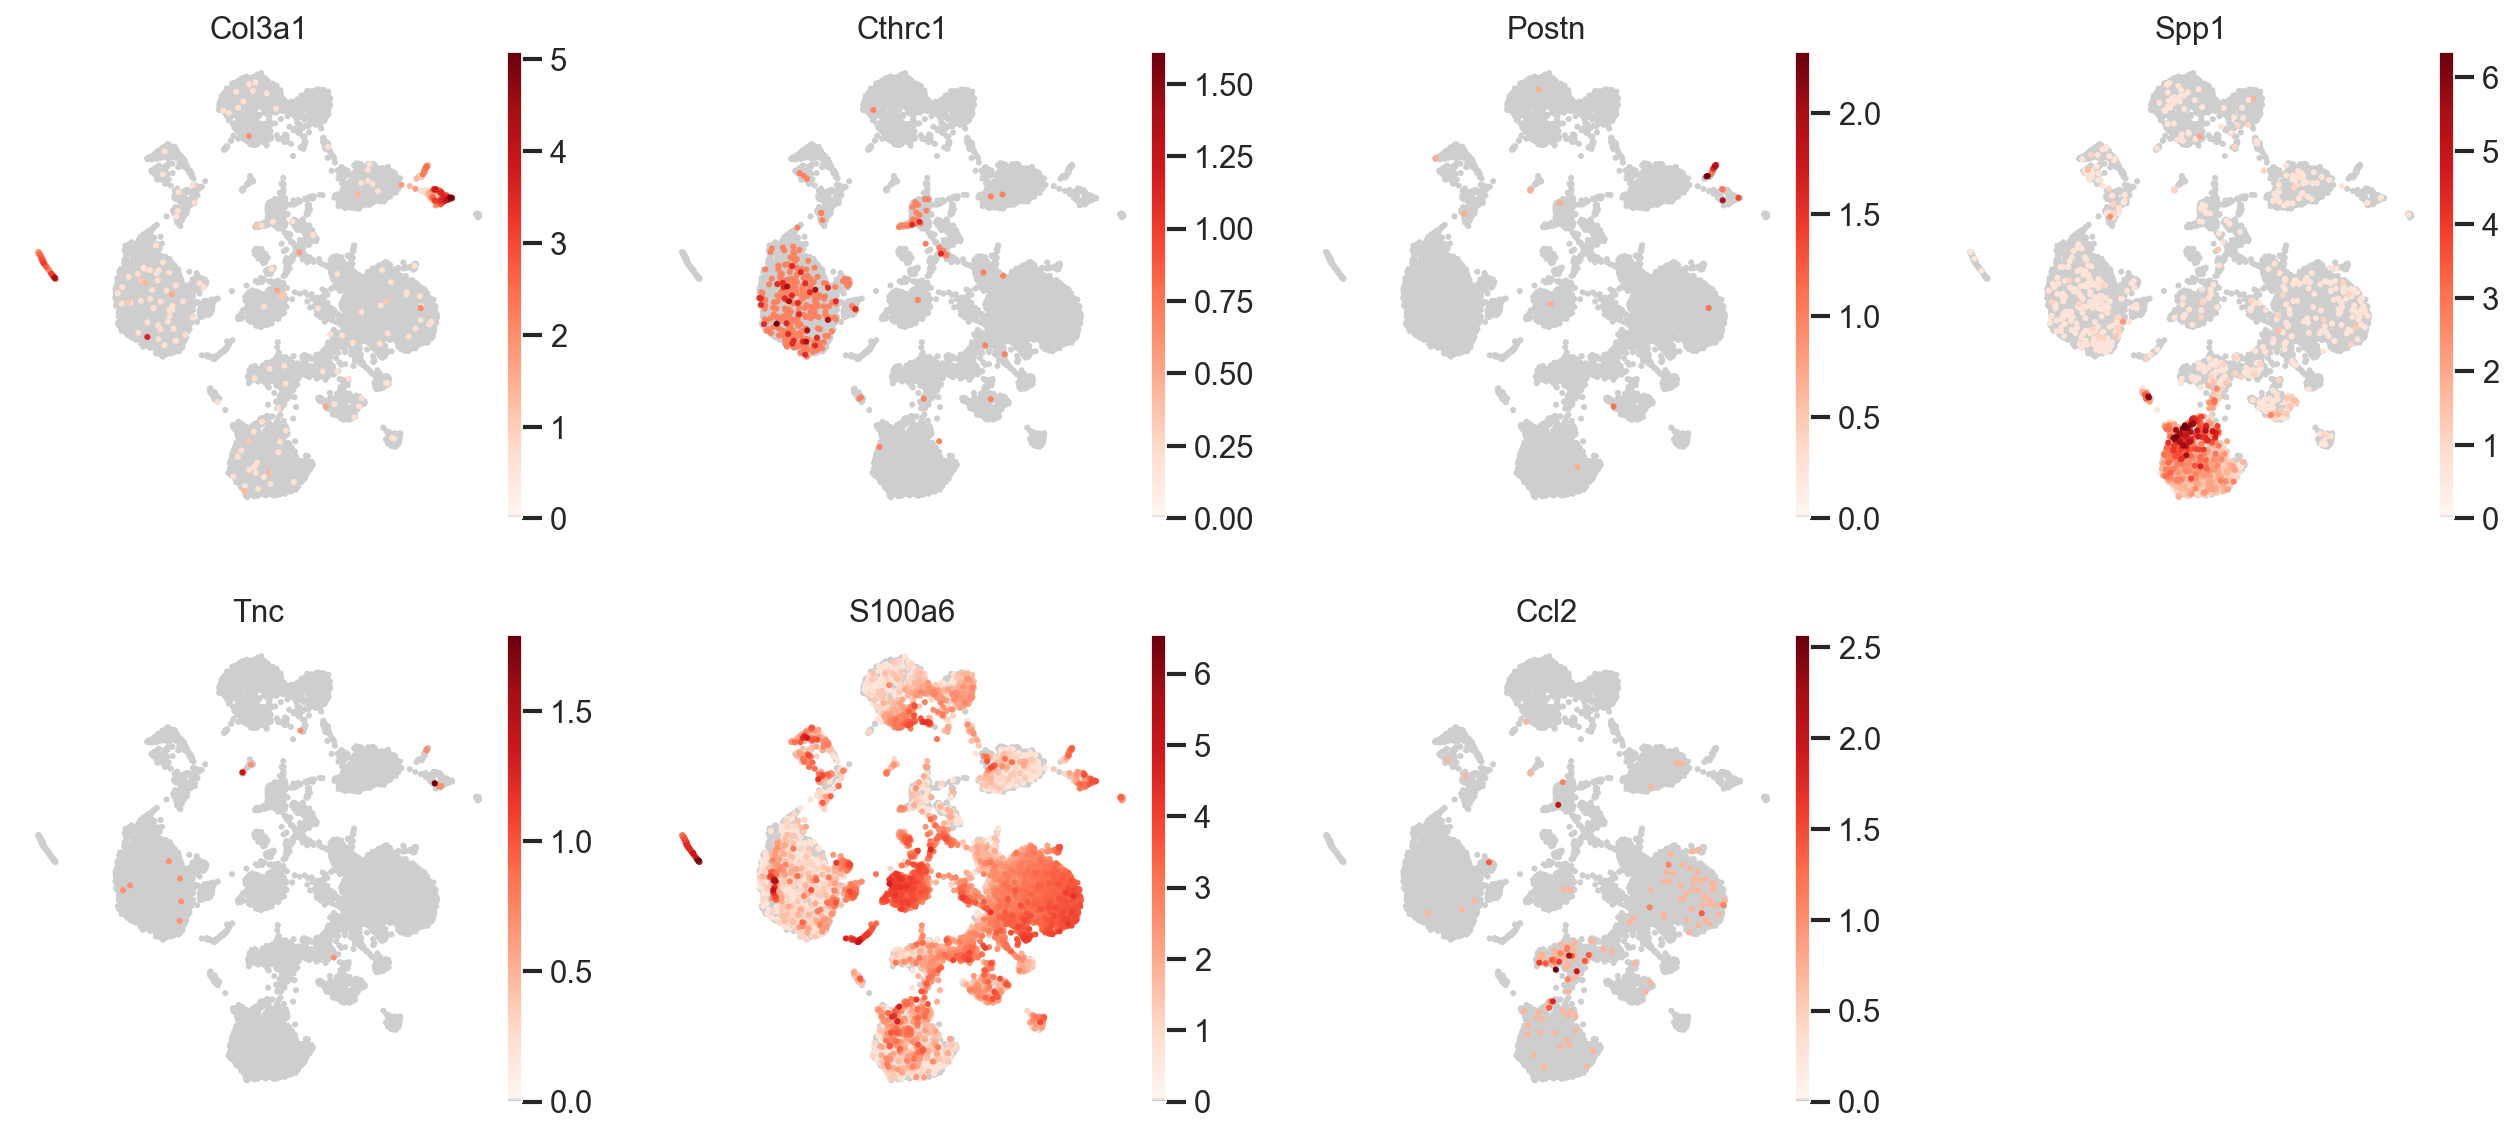

In [90]:
helper_classes_DanielStrobl.plot_markers(misharin_filtered)

In [97]:
cl_annotation_rough = {
	"0": "AT2",
	"1": "Monocyte",
	"2": "Macrophage",
	"3": "T-Cells",
	"4": "B-Cells",
    "5": "Monocyte",
	"7": "Macrophage",
	"9": "Krt8",
	"11": "Endothelial",
	"13": "Endothelial",
    "14": "Fibroblasts",
    "17": "AT2",
	"18": "AT1"
}

In [98]:
misharin_filtered.obs["manual_celltype_annotation_rough"] = misharin_filtered.obs.louvain.map(cl_annotation_rough)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


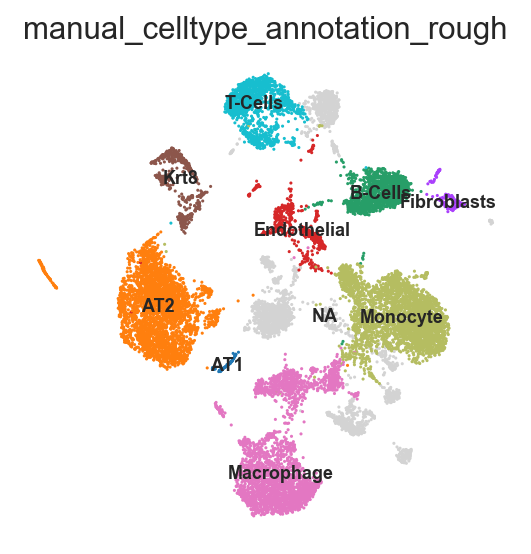

In [99]:
scanpy.pl.umap(misharin_filtered, color=["manual_celltype_annotation_rough"], legend_loc="on data", legend_fontsize="xx-small")

## Defining more marker genes:
Source: https://docs.google.com/spreadsheets/d/1nUMZA_I9bliJX1-x_-KRqKrF_6e229gx_l_GtOwt0rU/edit#gid=0

In [38]:
marker_genes = {
    "Neutrophil": ["S100a8", "S100a9"],
    "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],   # Vegfa added from Helperclass
    "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],   # Lcn2 added from Helperclass
    "Transitioning epi": ["Krt8", "Krt18"],
    "Club": ["Scgb1a1", "Scgb3a2"],
    "Goblet": ["Muc5ac", "Muc5b"],
    "Ciliated": ["Foxj1", "Pifo"],
    "T-Cells": ["Cd3e", "Cd4", "Cd8a", "Cd3d"],   # Cd3d added from Helperclass
    "NK-Cells": ["Tyrobp", "Gzma", "Nkg7"],
    "B-Cells": ["Cd79a", "Cd19", "Ms4a1"],
    "Monocytes": ["Cd14", "Vcan", "FCGR3A (CD16)", "Fcgr4"],
    "Plasmacytoid dendridic": ["Siglech", "Clec4c"],
    "Interstitial macrophages": ["Trem2", "C1qa"],
    "Alveolar macrophage": ["Marco", "Chil3", "Fabp4"],
    "Classical Monocyte": ["F13a1", "Ly6c2"],
    "Nonclassical monocyte": ["Treml4", "Fcgr3"],
    "Dendridic": ["Clec9a", "H2-Aa"],
    "Ccr7 dendridic": ["Ccr7"],
    "Basophil": ["Cpa3"],
    "SMCs": ["Acta2", "Tagln"],
    "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],   # Col3a1, Postn, Tnc, S100a6, Ccl2 added from Helperclass
    "Fibroblasts": ["Col1a2"],
    "Mesothelial": ["Msln", "Upk3b"],
    "Pericytes": ["Vtn", "Mcam"],
    "Peribronchiolar fibroblasts": ["Hhip", "Aspn"],
    "Alveolar fibroblasts": ["Npnt"],
    "Adventitial fibroblasts": ["Dcn", "Pi16"],
    "Endothelial": ["Pecam1", "Ly6c1"],
    "Aerocyte": ["Car4", "Ednrb"],
    "Vein endo": ["Slc6a2", "Vegfc"],
    "Lymphatic endothelial": ["Pdpn"]
}

In [39]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in misharin_filtered.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

## Visualizing the genes:

In [40]:
scanpy.tl.pca(misharin_filtered, n_comps=50, use_highly_variable=True)
scanpy.pp.neighbors(misharin_filtered)
scanpy.tl.umap(misharin_filtered)

In [76]:
take_a_further_look = [
	"Monocytes",
	"Nonclassical monocyte",
	"Interstitial macrophages",
    "Alveolar macrophage",
    "Classical Monocyte"
]

MONOCYTES:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


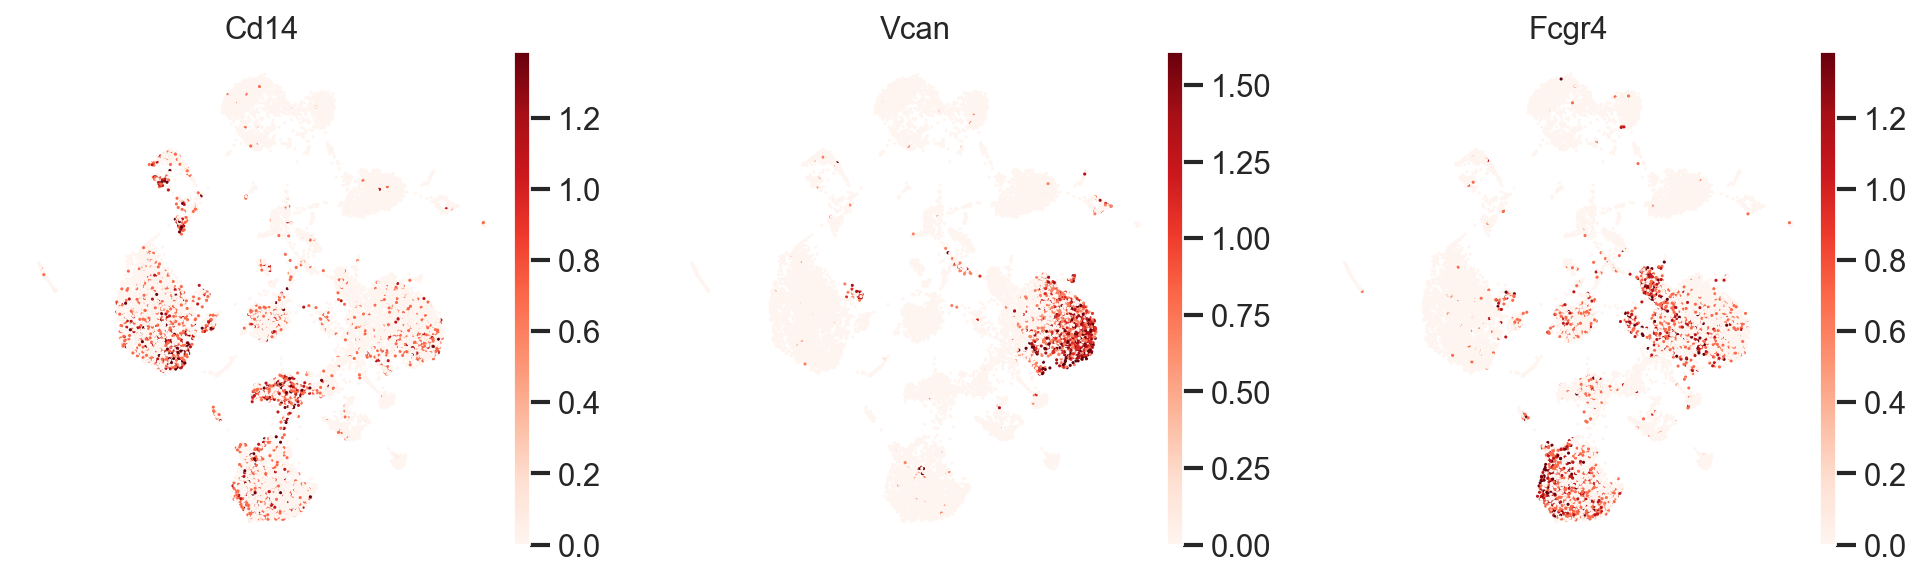





NONCLASSICAL MONOCYTE:


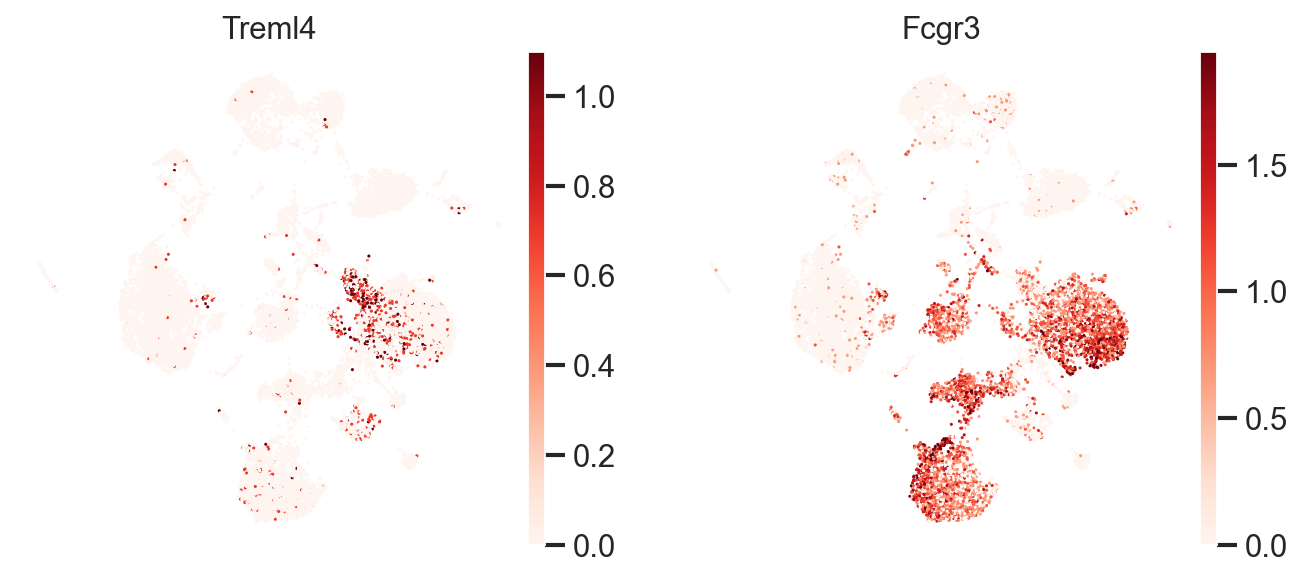





INTERSTITIAL MACROPHAGES:


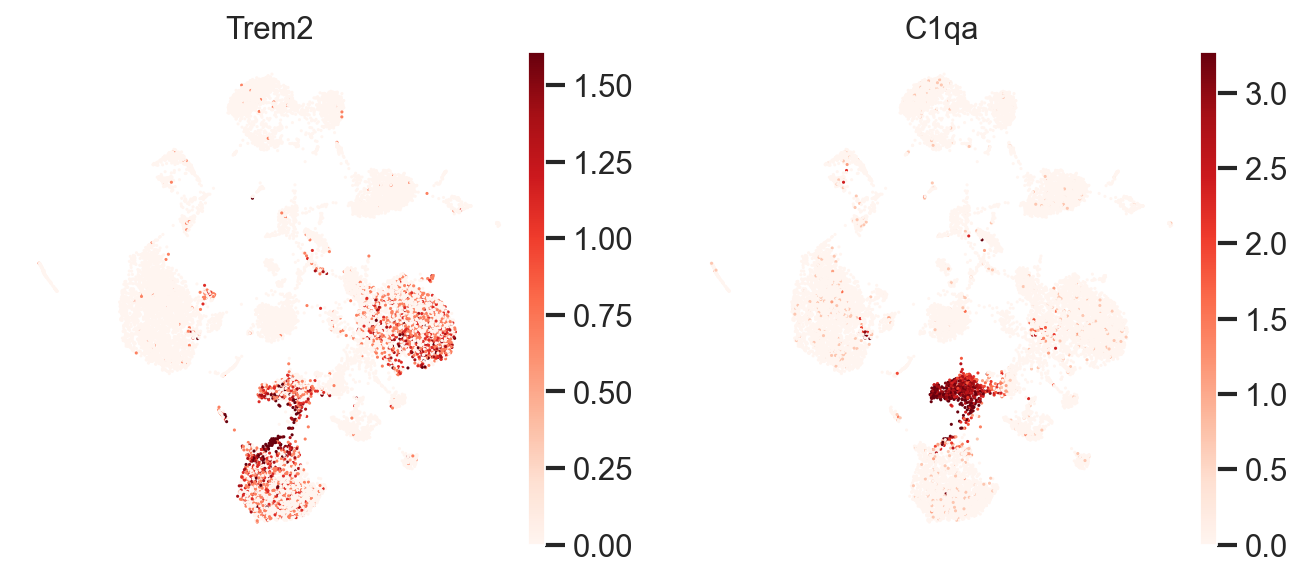





ALVEOLAR MACROPHAGE:


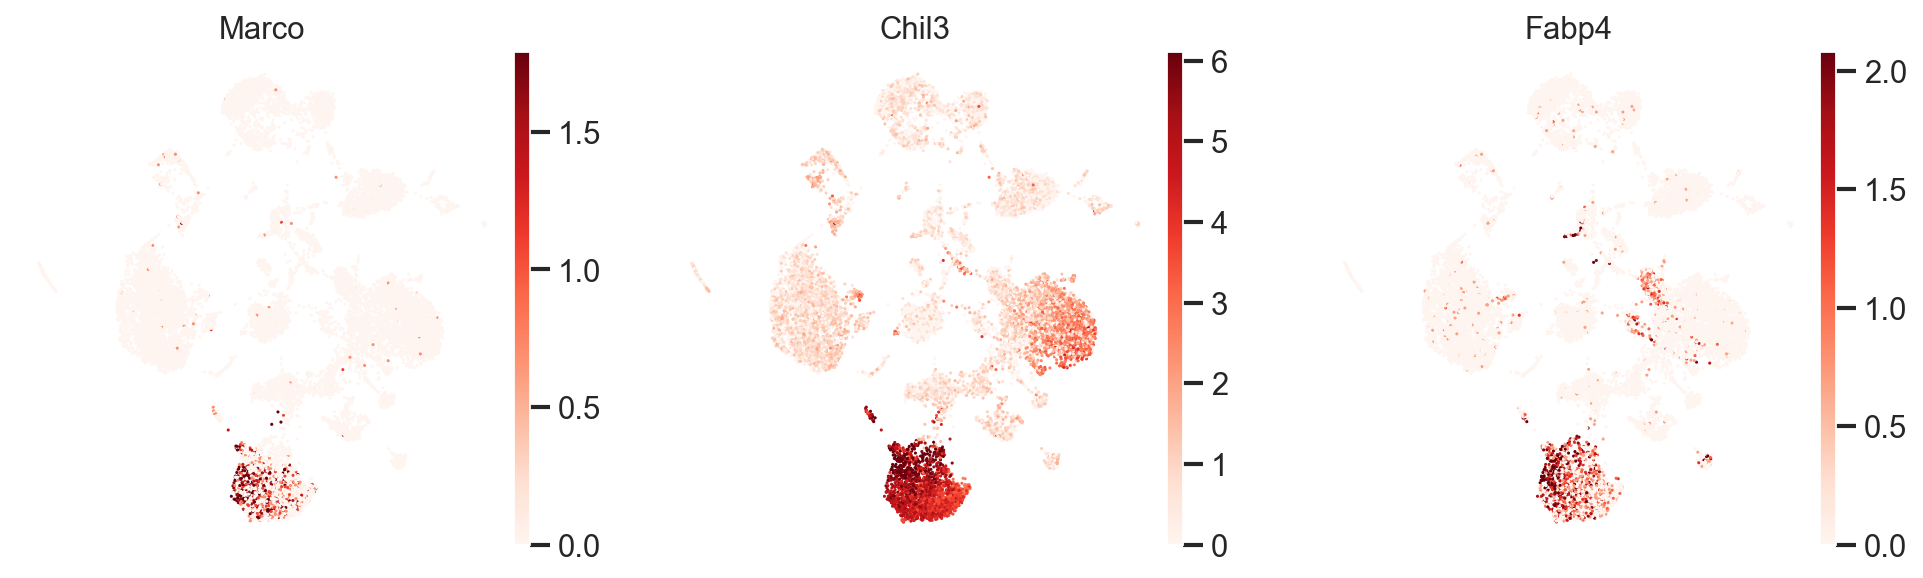





CLASSICAL MONOCYTE:


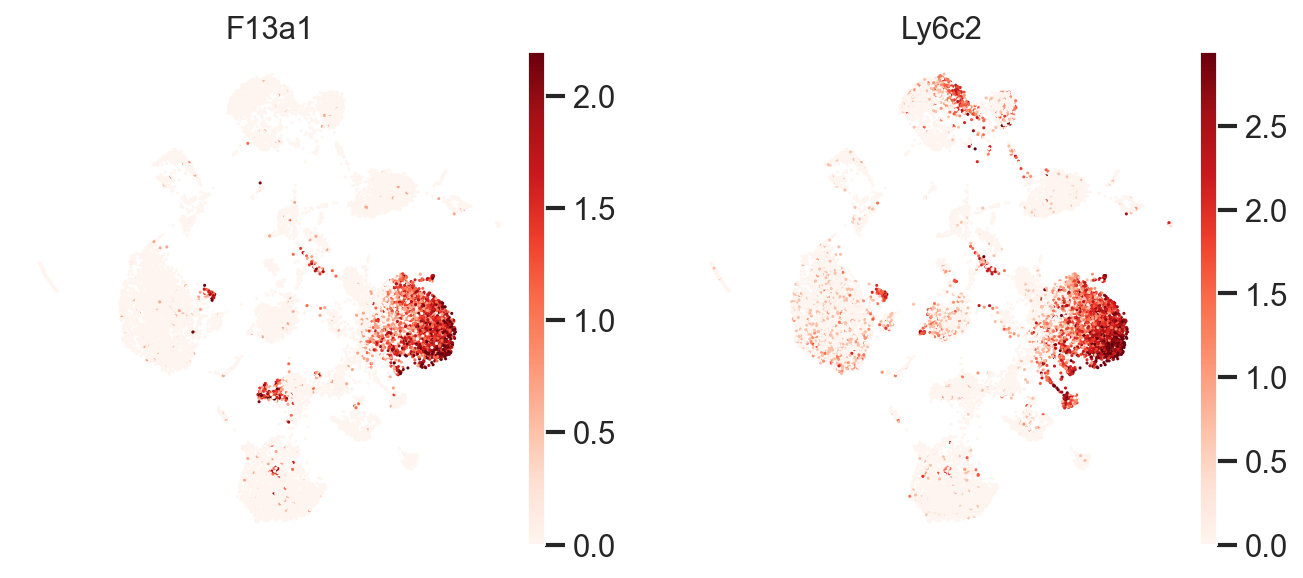

In [77]:
for ct in take_a_further_look:
    print(f"{ct.upper()}:")  # print cell subtype name
    scanpy.pl.umap(
        misharin_filtered,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon=False,
        cmap="Reds",  # or choose another color map e.g. from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    )
    print("\n\n\n")  # print white space for legibility

## Annotating the clusters that clearly belong to one cell type:

In [50]:
cl_annotation = {
	"0": "AT2",
	"1": "Classical monocyte",
	"2": "Alveolar macrophage",
	"3": "T-Cells",
	"4": "B-Cells",
    "6": "Neutrophil",
	"7": "Interstitial macrophages",
	"8": "NK-Cells",
	"9": "Transitioning epi",
	"10": "Dendridic",
	"11": "Endothelial",
    "12": "Neutrophil",
	"13": "Aerocyte",
	"15": "Plasmacytoid dendridic",
	"16": "CCR7 dendridic",
	"18": "AT1"
}

In [51]:
misharin_filtered.obs["manual_celltype_annotation"] = misharin_filtered.obs.louvain.map(cl_annotation)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


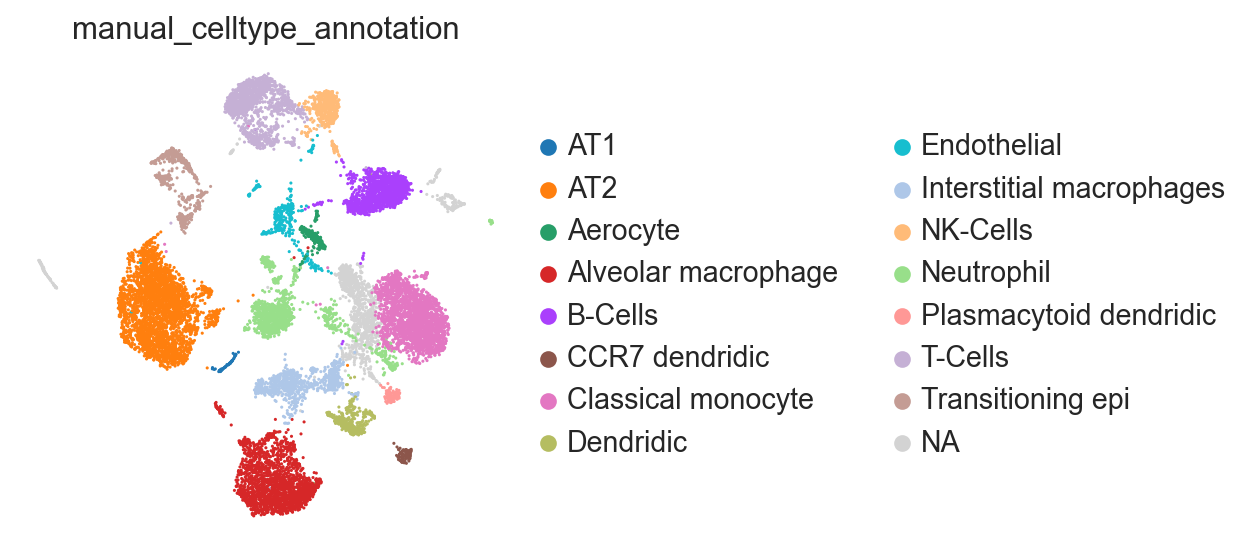

In [63]:
scanpy.pl.umap(misharin_filtered, color=["manual_celltype_annotation"])

## Using differentially expressed genes to annotate the remaining clusters:

In [55]:
misharin_filtered.uns['log1p']["base"] = None

In [58]:
scanpy.tl.rank_genes_groups(
    misharin_filtered, groupby="louvain", method="wilcoxon", key_added="dea_louvain_0_5"
)

In [60]:
scanpy.tl.filter_rank_genes_groups(
    misharin_filtered, min_in_group_fraction=0.2, max_out_group_fraction=0.2, key="dea_louvain_0_5", key_added="dea_louvain_0_5_filtered",
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


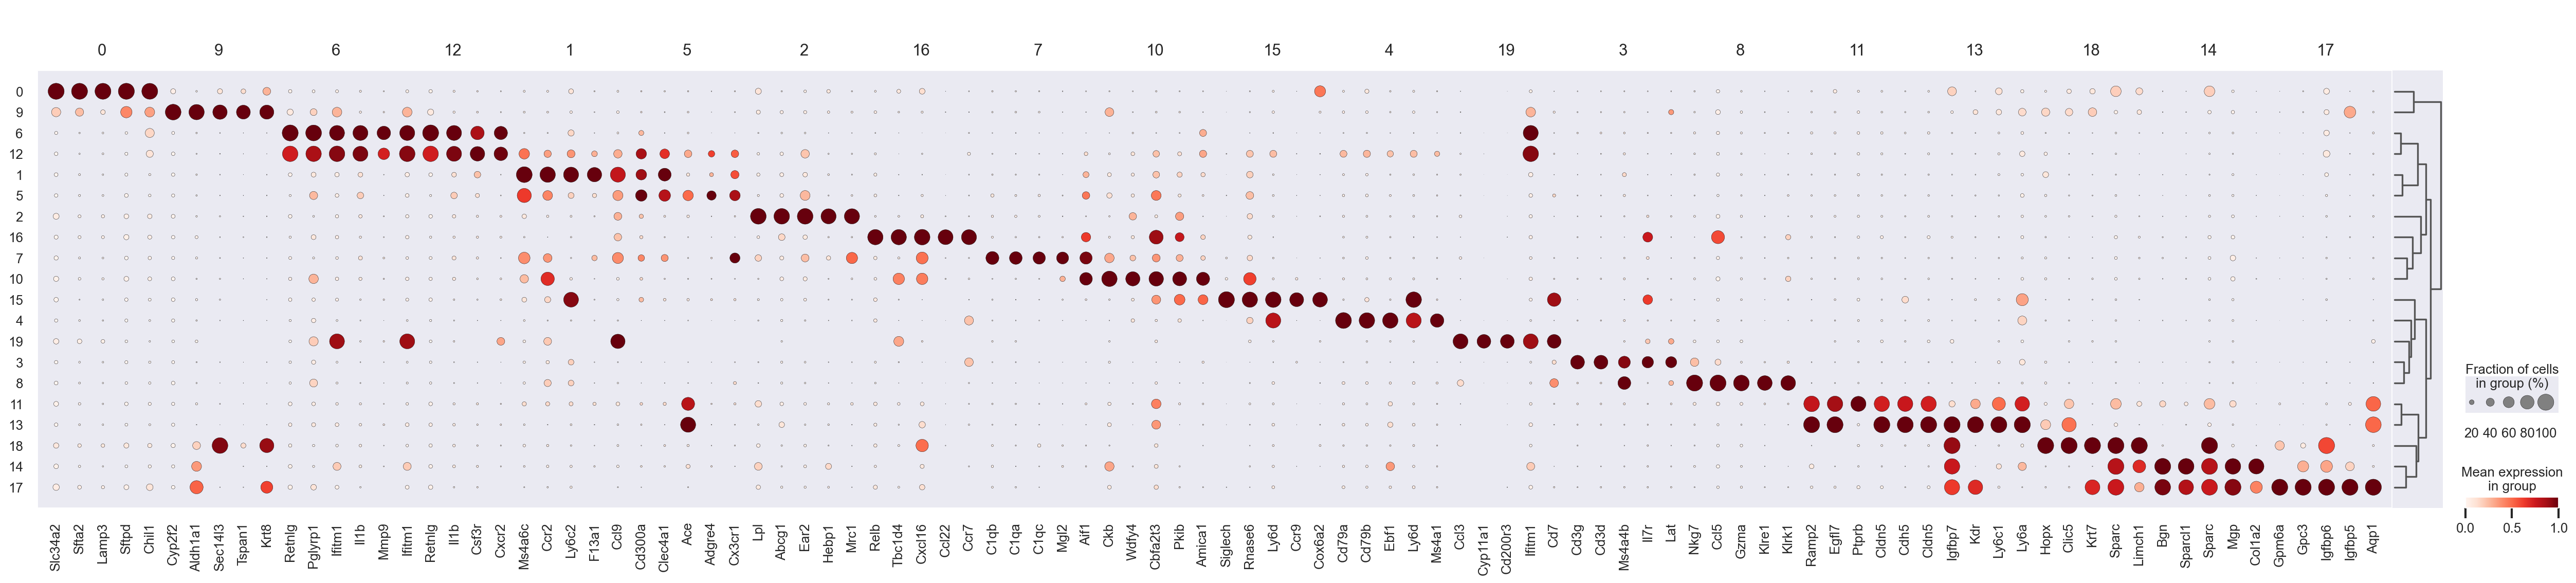

In [62]:
scanpy.pl.rank_genes_groups_dotplot(
    misharin_filtered, groupby="louvain", standard_scale="var", n_genes=5, key="dea_louvain_0_5_filtered",
)

### Unannotated clusters:
**5:**
- Cd300a, Clec4a1, Ace, Adgre4, Cx3cr1
- Conclusion: Monocyte/macrophage

**14:**
- Bgn, Sparcl1, Sparc, Mgp, Col1a2
- Conclusion: Fibroblasts

**17:**
- Cpm6a, Gpc3, Igfbp5, Igfbp6, Aqp1
- Conclusion: Hepatocytes

**19:**
- Ccl3, Cyp11a1, Cd200r3, Iftm1, Cd7
- Conclusion: Immune response ?

In [78]:
cl_annotation = {
	"0": "AT2",
	"1": "Classical monocyte",
	"2": "Alveolar macrophages",
	"3": "T-Cells",
	"4": "B-Cells",
    "5": "Monocytes",
    "6": "Neutrophil",
	"7": "Interstitial macrophages",
	"8": "NK-Cells",
	"9": "Transitioning epi",
	"10": "Dendridic",
	"11": "Endothelial",
    "12": "Neutrophil",
	"13": "Aerocyte",
    "14": "Fibroblasts",
	"15": "Plasmacytoid dendridic",
	"16": "CCR7 dendridic",
    "17": "Hepatocytes",
	"18": "AT1",
    "19": "Immune response ?"
}

In [79]:
misharin_filtered.obs["manual_celltype_annotation"] = misharin_filtered.obs.louvain.map(cl_annotation)

## Plotting a UMAP with the final annotation:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


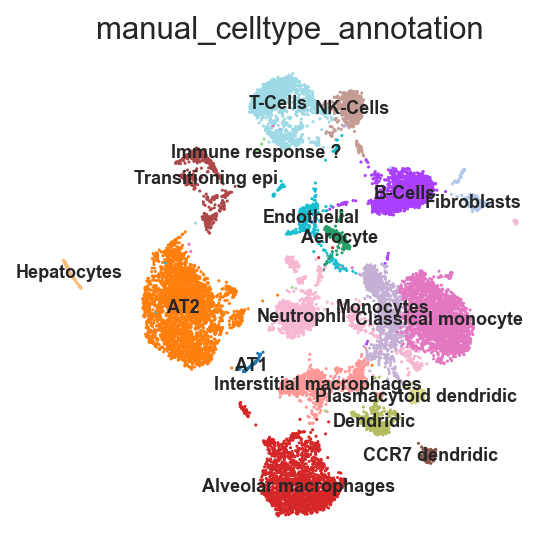

In [87]:
scanpy.pl.umap(misharin_filtered, color=["manual_celltype_annotation"], legend_loc="on data", legend_fontsize="xx-small")

## Creating a dendogam of the clusters:

In [81]:
scanpy.tl.dendrogram(misharin_filtered, groupby="manual_celltype_annotation")

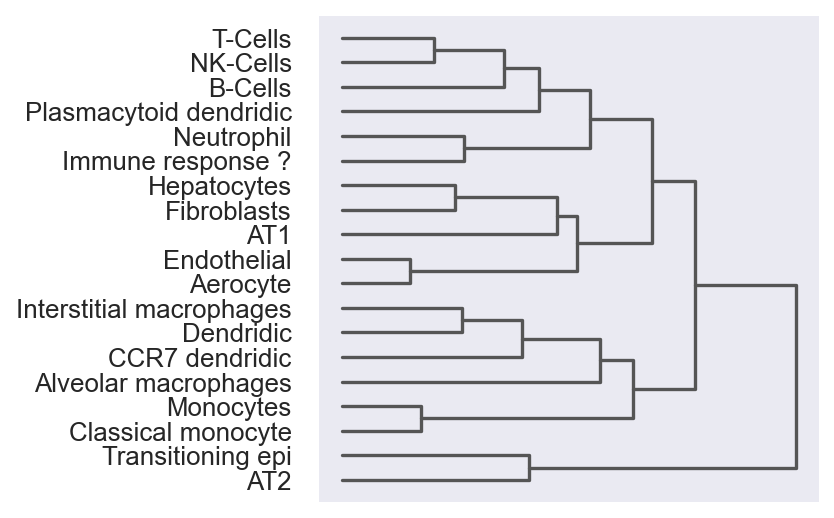

<AxesSubplot: >

In [82]:
scanpy.pl.dendrogram(misharin_filtered, groupby="manual_celltype_annotation", orientation="right")

## Saving the annotated file:

In [86]:
misharin_filtered.write(output + "misharin_Emma_processed_annotated.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'names' of <class 'h5py._hl.group.Group'> to /